# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [63]:
medical.shape

(1338, 8)

In [64]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The mean and standard deviation don't appear to be appropriate in this case because of the heavy right skew of the data we have. 
This is not a normal distribution, at least as far as the sample is concerned. 
Using the median and IQR might provide a better understanding of the variability in the sample data. 

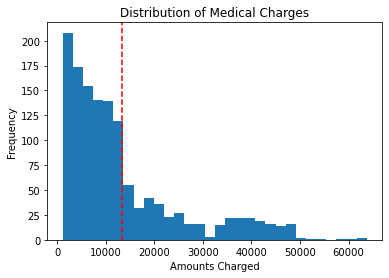

In [65]:
#Plot the histogram
_ = plt.hist(medical['charges'], bins=30)
_ = plt.xlabel('Amounts Charged')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Medical Charges')

#plotting the mean of the data
_ = plt.axvline(13270.422265141257,color = 'r', linestyle = '--')


_ =plt.show()

In [66]:
print('The mean of the charges is ' + str(np.mean(medical['charges'])) + '.')

#Using 1 degree of freedom because we are working with a sample
print('The standard deviation of the charges is ' + str(np.std(medical['charges'], ddof=1)) + '.')


The mean of the charges is 13270.422265141257.
The standard deviation of the charges is 12110.011236694001.


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ To answer this question, we would need to set up a hypothesis test, where the null hypothesis is that the average charge is at least 12,000. 
We would then perform a t-test to determine if the mean of the sample is unusual enough to justify rejecting the null hypothesis.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ We are interested in knowing if the population mean has fallen below 12,000. 
We should use a one sided interval to answer this question, because we are only interested in the mean being lower than the 12000 threashold
Based on the below - it does not appear that the administrator should be concerned. We can be 95% confident that the true mean is above 12000

In [67]:
#Calculate the critical value

n = len(medical)

critical_t_value = t.ppf(q = 0.05, df = n)

print(critical_t_value)


-1.6459932615808077


In [68]:
#Standard error for this sample
standard_error = np.std(medical['charges'], ddof = 1)/(np.sqrt(n))
print('The standard error is: ' + str(standard_error))

#Calculate the margin of error
margin_of_error_t = standard_error * critical_t_value
print('The margin of error is + or - : ' + str(margin_of_error_t))


The standard error is: 331.0674543156824
The margin of error is + or - : -544.9347989323252


In [69]:
#95% confidence interval for the mean. 

population_mean_est = np.mean(medical['charges'])

upper_bound_t = population_mean_est + margin_of_error_t
lower_bound_t = population_mean_est - margin_of_error_t

print ('We can be 95% confident that the population value is ' + str(population_mean_est) \
       + ' plus or minus ' + str(margin_of_error_t)+'.\n''The value lies between ' + str(lower_bound_t) + ' and ' + str(upper_bound_t)+'.')

print('This interval does not include the 12000 threshold that the administrator was concerned about')

We can be 95% confident that the population value is 13270.422265141257 plus or minus -544.9347989323252.
The value lies between 13815.357064073582 and 12725.487466208931.
This interval does not include the 12000 threshold that the administrator was concerned about


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis in this case is that there is no difference in the charges for insured and non insured people. 
The assumpion being made about the two groups in this case is that the populations have the same variance. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [70]:
#Pull out and define the values of the 2 samples (insurance claim vs. no insurance claim)

insured = medical['charges'][medical['insuranceclaim'] == True]
not_insured = medical['charges'][medical['insuranceclaim']== False]

insured_mean = np.mean(insured)
not_insured_mean = np.mean(not_insured)

insured_n = len(insured)
not_insured_n = len(not_insured)

insured_variance = np.var(insured)
not_insured_variance = np.var(not_insured)

In [71]:
#Calculate the pooled standard deviation

pooled_SD = np.sqrt(((insured_n - 1)*insured_variance + (not_insured_n -1)*not_insured_variance)/(insured_n + not_insured_n - 2))
print('The pooled standard deviation is ' + str(pooled_SD))

The pooled standard deviation is 11512.28289920575


In [74]:
#Calculate the t-test statisitic
t = (insured_mean - not_insured_mean) / pooled_SD * (np.sqrt((1/insured_n)+ (1/not_insured_n)))
print('The t statisitic is ' + str(t))



The t statisitic is 0.036643422020818765


In [75]:
#Do the same calculation using the scipy.stats.ttest_ind
from scipy.stats import ttest_ind

t_test = ttest_ind(insured, not_insured, equal_var = True)
print(t_test)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test